<a href="https://colab.research.google.com/github/ShashankMA02/Deep_learning_NN_PyTorch/blob/main/NN2_Hexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
## Many layers


import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# %matplotlib inline

In [7]:
class FKModel(nn.Module):
    def __init__(self, in_features=6, hidden_size=60, num_layers=10, out_features=6):
        super(FKModel, self).__init__()

        # Initial input layer
        self.input_layer = nn.Linear(in_features, hidden_size)

        # Hidden layers
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(hidden_size, hidden_size) for _ in range(num_layers)]
        )

        # Output layer
        self.output_layer = nn.Linear(hidden_size, out_features)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x

torch.manual_seed(42)
model = FKModel()
print(model)

FKModel(
  (input_layer): Linear(in_features=6, out_features=60, bias=True)
  (hidden_layers): ModuleList(
    (0-9): 10 x Linear(in_features=60, out_features=60, bias=True)
  )
  (output_layer): Linear(in_features=60, out_features=6, bias=True)
)


In [8]:
# motor_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/XY_0_50_s1_mot.csv'
# position_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/XY_0_50_s1_pos.csv'

motor_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/Motor_Data_master_copy.csv'

position_url = 'https://raw.githubusercontent.com/ShashankMA02/CSV_data_of_Hexa/main/Position_Data_master_copy.csv'

mot_df = pd.read_csv(motor_url)
pos_df = pd.read_csv(position_url)

# Train Test Split set X, y
X = mot_df  # Motors values as input
y = pos_df  # Position values as output , hence Forward Kinematics

# Normalize the data
scaler_motors = StandardScaler()
scaler_positions = StandardScaler()

X = scaler_motors.fit_transform(X)
y = scaler_positions.fit_transform(y)

Epochs: 0 and loss: 0.34217193722724915
Epochs: 10 and loss: 0.33642691373825073
Epochs: 20 and loss: 0.3317508399486542
Epochs: 30 and loss: 0.3117620646953583
Epochs: 40 and loss: 0.21330279111862183
Epochs: 50 and loss: 0.15826180577278137
Epochs: 60 and loss: 0.07891935110092163
Epochs: 70 and loss: 0.0317213274538517
Epochs: 80 and loss: 0.01278883870691061
Epochs: 90 and loss: 0.0032976658549159765
Epochs: 100 and loss: 0.0010662070708349347
Epochs: 110 and loss: 0.0008913309429772198
Epochs: 120 and loss: 0.0005623530014418066
Epochs: 130 and loss: 0.0003536031290423125
Epochs: 140 and loss: 0.0002763868833426386
Epochs: 150 and loss: 0.00020122795831412077
Epochs: 160 and loss: 0.0016255766386166215
Epochs: 170 and loss: 0.002369823632761836
Epochs: 180 and loss: 0.00022916386660654098
Epochs: 190 and loss: 0.00040442554745823145
Epochs: 200 and loss: 0.00015578993770759553
Epochs: 210 and loss: 0.00014383021334651858
Epochs: 220 and loss: 0.00010751603986136615
Epochs: 230 and

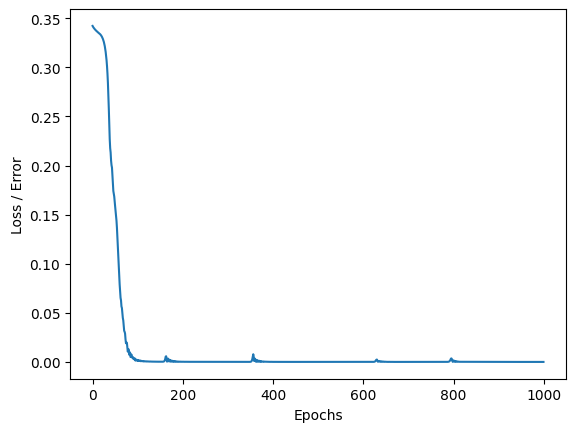

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Criterion to measure error of prediction
criterion = nn.MSELoss()

# Optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Model training
epochs = 1000
losses = []

for i in range(epochs):
    # go forward and get a prediction
    y_pred = model.forward(X_train)      # get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train)    #predicted values vs the y_train

    # keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 == 0:
        print(f'Epochs: {i} and loss: {loss}')

    # Do some backpropagation: take the error rate of forward propagation and
    # feed it back through the network to fine-tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss / Error')
plt.xlabel('Epochs')
plt.show()


In [10]:
# Evaluate Model on Test data set
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    print(f'Loss: {loss}')

# New motor values for prediction
motors_new = [[2215, 1881, 2215, 1879, 2217, 1881]]  # Replace with actual new motor values

# Normalize the new motor values
motors_new = scaler_motors.transform(motors_new)
motors_new = torch.tensor(motors_new, dtype=torch.float32)

# Make predictions
model.eval()
with torch.no_grad():
    positions_pred = model(motors_new)
    positions_pred = scaler_positions.inverse_transform(positions_pred.numpy())

print('Predicted positions:', positions_pred)

Loss: 1.677344880590681e-05
Predicted positions: [[ 8.1196271e-02 -5.7692896e-03  2.8999921e+02 -6.1651617e-03
   3.8014352e-04  1.4844239e-03]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
